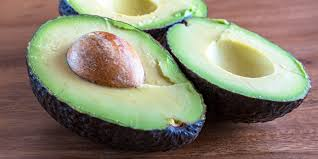

# Docking with Data and Securing Notebook

In [80]:
!pip install -q kaggle

!mkdir -p ~/.kaggle

!cp kaggle.json ~/.kaggle/     # upload the api token created from your kaggle account and paste it in files and write [!cp 'api token file' ~/.kaggle/ ]

!chmod 600 ~/.kaggle/kaggle.json

Downloading data in workspace

In [81]:
!kaggle datasets download -d neuromusic/avocado-prices

avocado-prices.zip: Skipping, found more recently modified local copy (use --force to force download)


Unzipping files

In [82]:
from zipfile import ZipFile
zf = ZipFile('/content/avocado-prices.zip', 'r')
zf.extractall('/content')
zf.close()

# Libraries

In [83]:
# for visualization -------------------

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# for data pipeline --------------------

from sklearn.model_selection import train_test_split
from sklearn.metrics import*
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline

# for prediction (machine learning models) ------------------------

from sklearn.linear_model import*
from sklearn.preprocessing import*
from sklearn.ensemble import*
from sklearn.neighbors import*
from sklearn import svm
from sklearn.naive_bayes import*

# Data gathering and Primary visualization

In [84]:
df=pd.read_csv('/content/avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [86]:
print('shape of the data :',df.shape)

shape of the data : (18249, 14)


If there is any duplicates we can remove them now.

In [87]:
print('total number of duplicate values : ',sum(df.duplicated()))

total number of duplicate values :  0


So we do not have to drop any row or column and we can proceed to the next step.

# Train and validation data

As we are predicting the price of the avocados we are going to put the prices column in the Y and rest of the data in X

In [88]:
X=df.drop('AveragePrice',1)
y=df['AveragePrice']

In [89]:
print('shape of X and y respectively :',X.shape,y.shape)

shape of X and y respectively : (18249, 13) (18249,)


As the dataset is medium in size we can perform a 80-20 train test split over the dataset.

In [90]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [91]:
print('shape of X and y respectively(train) :',X_train.shape,y_train.shape)
print('shape of X and y respectively(test) :',X_test.shape,y_test.shape)

shape of X and y respectively(train) : (14599, 13) (14599,)
shape of X and y respectively(test) : (3650, 13) (3650,)


In [92]:
cols=X_train.columns

# Preprocessing

#### Encoding

At first we have to encode all the categorical columns to dig deep into the data.

In [93]:
scaler=LabelEncoder()

In [94]:
for col in X_train.columns:
    if df[col].dtype=='object':
        X_train[col]=scaler.fit_transform(X_train[col])
        X_test[col]=scaler.transform(X_test[col])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [95]:
X_train.head()

,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
14902,2,154,1797.04,28.34,552.03,0.00,1216.67,264.39,952.28,0.00,1,2017,3
7537,13,143,362296.15,97772.92,104336.09,14152.16,146034.98,92339.30,52994.80,700.88,0,2017,36
9720,22,29,12801.03,11536.00,337.16,0.00,927.87,927.87,0.00,0.00,1,2015,11
2105,25,26,550810.62,161220.26,305122.62,17131.92,67335.82,67335.82,0.00,0.00,0,2015,40
18083,2,166,8634.75,2317.50,3561.20,0.00,2756.05,2752.63,3.42,0.00,1,2018,40


#### Variance thresholding

Now after encoding the dataframe we have to omit the columns which are not contributing any pattern or key for finding good accuracy. That means we are going to drop the columns which have less variance than 0.1

In [96]:
scaler=VarianceThreshold(0.1)

In [97]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [98]:
print('shape of X (train) :',X_train.shape)
print('shape of X (test) :',X_test.shape)

shape of X (train) : (14599, 13)
shape of X (test) : (3650, 13)


Now we have found that every single  column is useful for predicting the data

#### Scaling

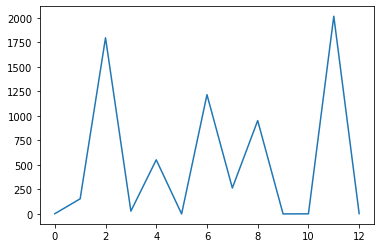

In [99]:
plt.plot(X_train[0])

This graph shows that the every single feature has different value ranges. So we need to scale the data for better performances.

In [100]:
scaler=StandardScaler()


In [101]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [102]:
print("Type of X_train :",type(X_train))
print("Type of X_test :",type(X_test))

Type of X_train : <class 'numpy.ndarray'>
Type of X_test : <class 'numpy.ndarray'>


So basically after using the variance thershold and standard scaler of sklearn module we have changed the pandas dataframe in numpy ndarray. So we are  going to convert them into pandas dataframe.

In [103]:
X_train=pd.DataFrame(X_train,columns=cols)
X_train.head()
X_test=pd.DataFrame(X_test,columns=cols)
X_test.head()

,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-1.369115,-0.735660,-0.244631,-0.229176,-0.242334,-0.214369,-0.242536,-0.245279,-0.216549,-0.177445,1.007080,-1.218764,-1.634131
1,0.046012,-1.185734,-0.189818,-0.226356,-0.143668,-0.085100,-0.188836,-0.203317,-0.133165,-0.107003,-0.992969,-1.218764,-0.479388
2,1.010872,-0.428790,0.061641,-0.146391,0.051818,-0.124087,0.358279,0.102441,1.144522,-0.177445,1.007080,-0.158916,1.573490
3,-0.532903,1.146472,-0.243018,-0.230010,-0.240243,-0.214369,-0.238336,-0.242477,-0.208167,-0.177445,1.007080,0.900933,-1.120912
4,-0.918847,1.514715,-0.241159,-0.229041,-0.241291,-0.207405,-0.232473,-0.230435,-0.221276,-0.177445,1.007080,1.960781,1.701795


In [104]:
print('Type of X_train and X_test :',type(X_train),type(X_test))

Type of X_train and X_test : <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


Now we can start the prediction.

# Pipelines

As this is a regression problem we are going to use famous regression models -
   1. Polynomial Regressor
   2. RandomForest Regressor
   3. Ridge Regressor
   4. Lasso Regressor
   5. Bayesian Ridge Regressor

In [105]:
actr=[]
acts=[]
lstr=[]
lsts=[]

### Polynomial Regression

In [106]:
loss=[]
val_loss=[]

In [107]:
for i in range(2,5):
  clf=make_pipeline(PolynomialFeatures(i),LinearRegression())
  clf.fit(X_train,y_train)
  y_pr=clf.predict(X_test)
  y_x=clf.predict(X_train)
  loss.append(mean_squared_error(y_train,y_x))
  val_loss.append(mean_squared_error(y_test,y_pr))

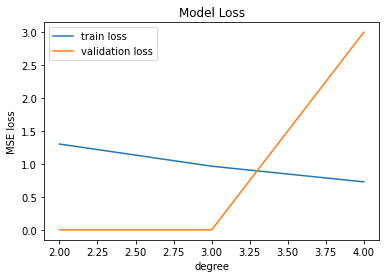

In [108]:
plt.title('Model Loss')
plt.xlabel('degree')
plt.ylabel('MSE loss')
plt.plot(range(2,5),loss/np.mean(loss),label='train loss')
plt.plot(range(2,5),val_loss/np.mean(val_loss),label='validation loss')
plt.legend()
plt.show()

We can say that degree =3 is appropriate for the model as the validation has too little loss and after that it reaches to a very high peak. That means after degree>3 ,the model is overfitting.

In [109]:
print('Train loss and validation loss of the polynomial function model :',loss[1],'and',val_loss[1])

Train loss and validation loss of the polynomial function model : 0.05922412150544968 0.09149022900344186


In [110]:
clf=make_pipeline(PolynomialFeatures(3),LinearRegression())
clf.fit(X_train,y_train)
print('train accuracy :',clf.score(X_train,y_train))
print('test accuracy :',clf.score(X_test,y_test))

train accuracy : 0.6342409917733671
test accuracy : 0.4383193607355418


Though degree=3 has the best accuracy over the polynomial function still it is very low and we can see that the valiation accurcay is less than 50%. So, it is not a good model.

In [111]:
actr.append(clf.score(X_train,y_train))
acts.append(clf.score(X_test,y_test))
lstr.append(loss[1])
lsts.append(val_loss[1])

### Random Forest Regression

In [112]:
clf=RandomForestRegressor(random_state=0)

In [113]:
clf.fit(X_train,y_train)
y_tr1=clf.predict(X_train)
y_pr=clf.predict(X_test)

print('train data accuracy :',clf.score(X_train,y_train))
print('test data accuracy :',clf.score(X_test,y_test))
print('loss of train data :',mean_squared_error(y_train,y_tr1))
print('loss of test data :',mean_squared_error(y_test,y_pr))

train data accuracy : 0.9870696087994129
test data accuracy : 0.9043277549814706
loss of train data : 0.002093703893417357
loss of test data : 0.01558372319452054


So we can see the RFR really predicts the model very well and gives a quite accurate prediction.

In [114]:
actr.append(clf.score(X_train,y_train))
acts.append(clf.score(X_test,y_test))
lstr.append(mean_squared_error(y_train,y_tr1))
lsts.append(mean_squared_error(y_test,y_pr))

### Ridge Regressor

In [115]:
loss=[]
val_loss=[]

In [116]:
for i in range(1,11):
  clf=Ridge(random_state=0,alpha=i/100.0)
  clf.fit(X_train,y_train)
  y_pr=clf.predict(X_test)
  y_x=clf.predict(X_train)
  loss.append(mean_squared_error(y_train,y_x))
  val_loss.append(mean_squared_error(y_test,y_pr))

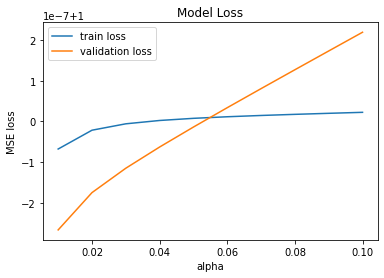

In [117]:
plt.title('Model Loss')
plt.xlabel('alpha')
plt.ylabel('MSE loss')
plt.plot(np.arange(1,11,1)/100,loss/np.mean(loss),label='train loss')
plt.plot(np.arange(1,11,1)/100,val_loss/np.mean(val_loss),label='validation loss')
plt.legend()
plt.show()

So we can say that the increase in alpha also affecting the model badly and giving us more loss than before.

In [118]:
clf=Ridge(random_state=0,alpha=0.01)
clf.fit(X_train,y_train)
y_tr1=clf.predict(X_train)
y_pr=clf.predict(X_test)

print('train data accuracy :',clf.score(X_train,y_train))
print('test data accuracy :',clf.score(X_test,y_test))
print('loss of train data :',mean_squared_error(y_train,y_tr1))
print('loss of test data :',mean_squared_error(y_test,y_pr))

train data accuracy : 0.4406070963478731
test data accuracy : 0.450490208497514
loss of train data : 0.0905775457337527
loss of test data : 0.08950776143901407


Still this model gives very bad stats in fitting.

In [119]:
actr.append(clf.score(X_train,y_train))
acts.append(clf.score(X_test,y_test))
lstr.append(mean_squared_error(y_train,y_tr1))
lsts.append(mean_squared_error(y_test,y_pr))

### Lasso Regression

In [120]:
loss=[]
val_loss=[]

In [121]:
for i in range(1,11):
  clf=Lasso(random_state=0,alpha=i/100.0)
  clf.fit(X_train,y_train)
  y_pr=clf.predict(X_test)
  y_x=clf.predict(X_train)
  loss.append(mean_squared_error(y_train,y_x))
  val_loss.append(mean_squared_error(y_test,y_pr))

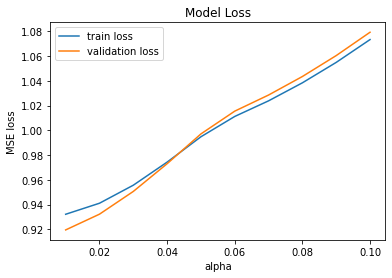

In [122]:
plt.title('Model Loss')
plt.xlabel('alpha')
plt.ylabel('MSE loss')
plt.plot(np.arange(1,11,1)/100,loss/np.mean(loss),label='train loss')
plt.plot(np.arange(1,11,1)/100,val_loss/np.mean(val_loss),label='validation loss')
plt.legend()
plt.show()

Lasso model also gives us similar results as we got in Ridge. We're taking the alpha=0.01

In [123]:
clf=Lasso(random_state=0,alpha=0.01)
clf.fit(X_train,y_train)
y_tr1=clf.predict(X_train)
y_pr=clf.predict(X_test)

print('train data accuracy :',clf.score(X_train,y_train))
print('test data accuracy :',clf.score(X_test,y_test))
print('loss of train data :',mean_squared_error(y_train,y_tr1))
print('loss of test data :',mean_squared_error(y_test,y_pr))

train data accuracy : 0.40661768321563996
test data accuracy : 0.4186581759369319
loss of train data : 0.09608115080694615
loss of test data : 0.0946927718257464


In [124]:
actr.append(clf.score(X_train,y_train))
acts.append(clf.score(X_test,y_test))
lstr.append(mean_squared_error(y_train,y_tr1))
lsts.append(mean_squared_error(y_test,y_pr))

### Bayesian Ridge Regression

In [125]:
clf=BayesianRidge()

In [126]:
clf.fit(X_train,y_train)
y_tr1=clf.predict(X_train)
y_pr=clf.predict(X_test)

print('train data accuracy :',clf.score(X_train,y_train))
print('test data accuracy :',clf.score(X_test,y_test))
print('loss of train data :',mean_squared_error(y_train,y_tr1))
print('loss of test data :',mean_squared_error(y_test,y_pr))

train data accuracy : 0.440602648193034
test data accuracy : 0.45047835683806436
loss of train data : 0.09057826598412724
loss of test data : 0.08950969191509124


In [127]:
actr.append(clf.score(X_train,y_train))
acts.append(clf.score(X_test,y_test))
lstr.append(mean_squared_error(y_train,y_tr1))
lsts.append(mean_squared_error(y_test,y_pr))

# Model Evaluation & Conclusion

In [128]:
models=['Polynomial','Random Forest','Ridge','Lasso','Bayesian Ridge']

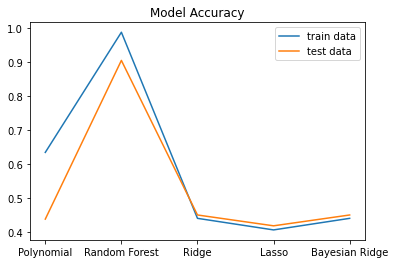

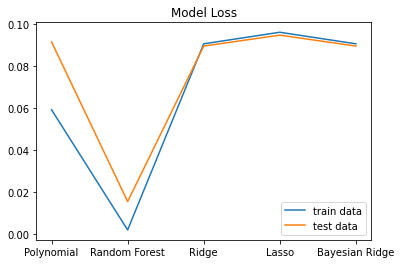

In [129]:
plt.title('Model Accuracy')
plt.plot(models,actr,label='train data')
plt.plot(models,acts,label='validation data')
plt.legend()
plt.show()

plt.title('Model Loss')
plt.plot(models,lstr,label='train data')
plt.plot(models,lsts,label='validation data')
plt.legend()
plt.show()

So, after visualizing , we have found that ,

                  Model performance :
                           Random Forest > Ridge > Bayesian Ridge > Lasso > Polynomial

After model evaluation we can conclude that, high dimensional data can not be fit well in low dimensional models and can give abrupt conclusions that may led to lower accuracy.

The RFR uses leafs that can reduce the dimensional complexity and generalize the model in a better approach. Thus it presents the best accuracy over the data.

Hurrah ! We have successfully complete the project .

**Upvote** in *kaggle* and **star** in *gitub*  if you like this kernel  **:)**

You can visit my otherworks in [*github*](https://github.com/sagnik1511?tab=repositories)  and in [*kaggle*](https://www.kaggle.com/sagnik1511)

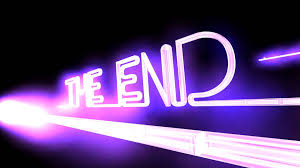